In [11]:
import sys
import itertools

#Takes a and M and returns the best state and Mondrian score found under the constrainsts in the form
# (state, mondrian_score)
def solve_mondrian(a, iterations, max_states):
    state = ([(a, a, (0, 0))], a*a)
    #f_state is best alternative state (state recursion is unwound to)
    f_state = state
    unused_f_states = []
    result = state
    #loop over number of iterations (number of nodes visited)
    for i in range(iterations):
        #get the best state from the current state along with all the other states considering all legal actions
        s = split(state[0], a)
        #if were in a leaf node, move to f_state (unwind tree)
        if (s == None):
            state = f_state
            unused_f_states.remove(f_state)
            try:
                f_state = unused_f_states[0]
            except: 
                break
        else:
            best_state, others = s
            #if the best state found is better than the current f_state, move to it
            if (best_state[1] < f_state[1]):
                unused_f_states += others
                unused_f_states = sorted(unused_f_states, key = lambda x: x[1])[:max_states]
                state = best_state
                try:
                    f_state = unused_f_states[0]
                except:
                    break
            #if f_state is better than the best state found, move back to f_state
            else:
                unused_f_states.append(best_state)
                unused_f_states += others
                unused_f_states = sorted(unused_f_states, key = lambda x: x[1])[:max_states]
                state = f_state
                unused_f_states.remove(f_state)
                try:
                    f_state = unused_f_states[0]
                except:
                    break
            #keep track of the best state during execution which is returned once the program halts
            if (state[1] < result[1]):
                result = state
            
    return(result)
    
def mondrian(s, a):
    minimum = a * a
    maximum = 0
    for tile in s:
        area = tile[0] * tile[1]
        if (area < minimum):
            minimum = area
        if (area > maximum):
            maximum = area
            
    return maximum - minimum

#takes the current state and returns the best state with score and all the other possible states in the form
# ((best_state, score), other_states_with_scores)
def split(s, a):
    best_state = None
    best_mondrian = sys.maxsize
    others = []
    #loop over all states
    for i in range(len(s)):
        #horizontal (each split until halfway line)
        for j in range(s[i][2][0]+1, (s[i][2][0]+s[i][0]//2)+1):
            test_state = list(s).copy()
            new_tile = (s[i][2][0]+s[i][0]-j, s[i][1], (j, s[i][2][1]))
            test_state.append(new_tile)
            old_tile = s[i][0]-test_state[-1][0], s[i][1], s[i][2]
            test_state[i] = (old_tile)
            
            m = mondrian(test_state, a)
            #if new tile is legal and better, update best state
            if (is_legal_tile(test_state, new_tile) and is_legal_tile(test_state, old_tile)):
                if (m < best_mondrian):
                    best_state = test_state
                    best_mondrian = m
                others.append((test_state, m))
                
        #vertical (each split until halfway line)
        for j in range(s[i][2][1]+1, (s[i][2][1]+s[i][1]//2)+1):
            test_state = list(s).copy()
            new_tile = (s[i][0], s[i][2][1]+s[i][1]-j, (s[i][2][0], j))
            test_state.append(new_tile)
            old_tile = s[i][0], s[i][1]-test_state[-1][1], s[i][2]
            test_state[i] = (old_tile)
            
            m = mondrian(test_state, a)
            #if new tile is legal and better, update best state
            if (is_legal_tile(test_state, old_tile) and is_legal_tile(test_state, new_tile)):
                if (m < best_mondrian):
                    best_state = test_state
                    best_mondrian = m
                others.append((test_state, m))

    if (best_state == None):
        return None
    else:
        b = (best_state, mondrian(best_state, a))
        others.remove(b)
        return (b, others)

def is_legal_tile(s, tile):
    found = False
    for t in s:
        if ((t[0] == tile[0] and t[1] == tile[1]) or (t[1] == tile[0] and t[0] == tile[1])):
            if (not found):
                found = True
            else:
                return False
    return True

In [5]:
#Example execution
print(solve_mondrian(20, 100, 10))

([(8, 1, (0, 0)), (5, 2, (8, 0)), (12, 2, (8, 9)), (1, 11, (0, 9)), (5, 6, (8, 14)), (1, 9, (13, 0)), (5, 4, (3, 9)), (3, 5, (0, 4)), (3, 6, (13, 14)), (4, 2, (16, 0)), (3, 3, (8, 11)), (2, 7, (3, 13)), (4, 6, (16, 14)), (5, 5, (3, 4)), (3, 7, (5, 13)), (1, 7, (8, 2)), (2, 11, (1, 9)), (2, 9, (14, 0)), (9, 3, (11, 11)), (4, 3, (16, 2)), (4, 4, (16, 5)), (4, 7, (9, 2)), (8, 3, (0, 1))], 23)


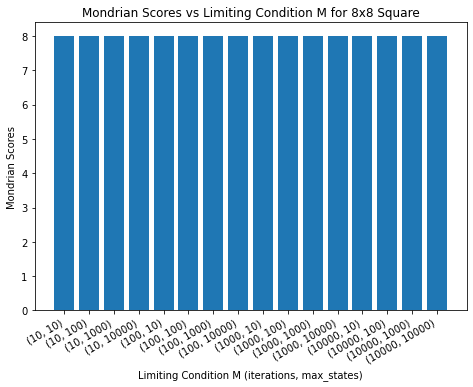

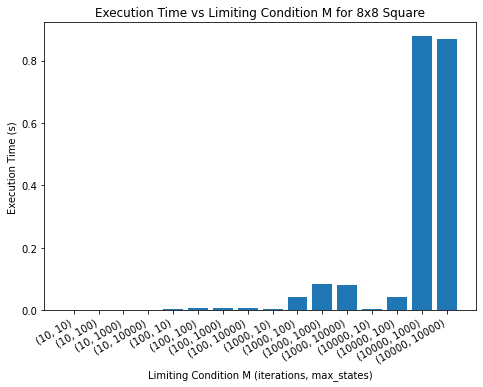

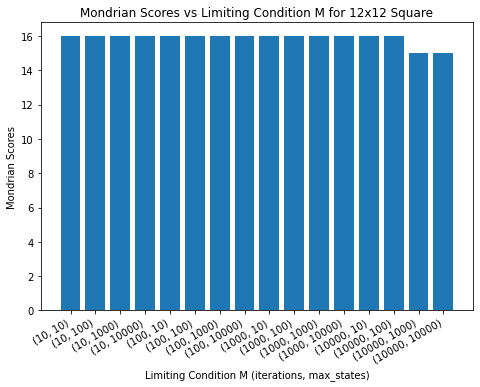

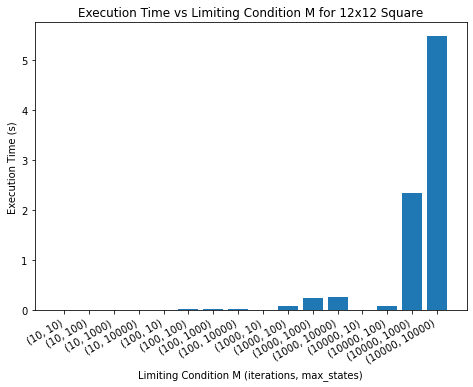

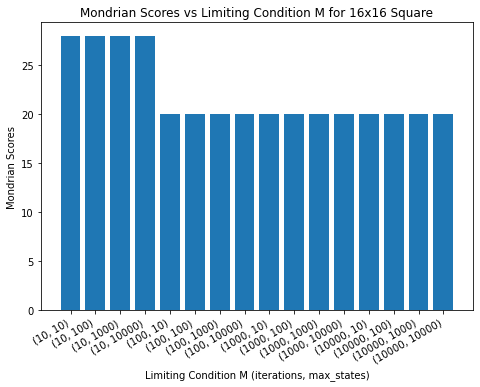

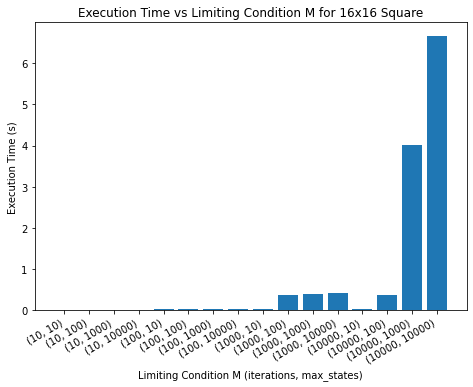

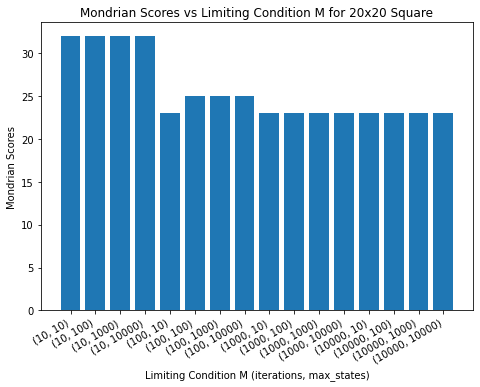

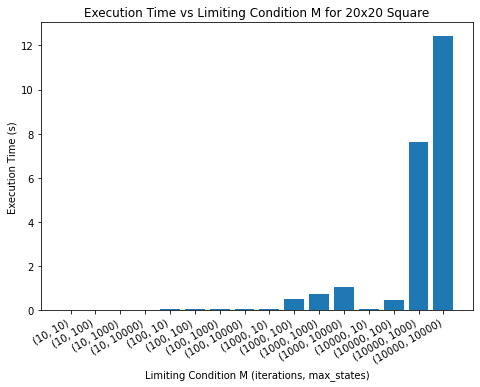

In [12]:
import matplotlib.pyplot as plt
import time


#Results generator
values = [10, 100, 1000, 10000]
for i in range(8, 21, 4):
    mondrians = []
    times = []
    Ms = []
    for j in values:
        for k in values:
            Ms.append(str((j, k)))
            start = time.time()
            mondrians.append(solve_mondrian(i, j, k)[1])
            end = time.time()
            times.append(end-start)
    fig1 = plt.figure()
    ax1 = fig1.add_axes([0, 0, 1, 1])
    ax1.set_xlabel("Limiting Condition M (iterations, max_states)")
    ax1.set_ylabel("Mondrian Scores")
    ax1.set_title(f"Mondrian Scores vs Limiting Condition M for {i}x{i} Square")
    plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
    ax1.bar(Ms, mondrians)
    plt.show()
    
    fig2 = plt.figure()
    ax2 = fig2.add_axes([0, 0, 1, 1])
    ax2.set_xlabel("Limiting Condition M (iterations, max_states)")
    ax2.set_ylabel("Execution Time (s)")
    ax2.set_title(f"Execution Time vs Limiting Condition M for {i}x{i} Square")
    plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')
    ax2.bar(Ms, times)
    plt.show()
            


In [64]:
#Visualiser
from PIL import Image, ImageDraw, ImageFont

def visualise(state, a):
    scalefactor = 200
    image = Image.new("RGB", (scalefactor*a, scalefactor*a), "white")
    draw = ImageDraw.Draw(image)
    for tile in state:
        draw.rectangle((tile[2][0]*scalefactor, tile[2][1]*scalefactor, 
                        (tile[2][0]+tile[0])*scalefactor, (tile[2][1]+tile[1])*scalefactor), 
                       fill="white", outline="black", width=2)
        center = (((tile[2][0]+tile[0]/2)-0.25)*scalefactor, ((tile[2][1]+tile[1]/2)-0.25)*scalefactor)
        font = ImageFont.truetype("arial.ttf", a*3)
        draw.text(center, f"{tile[0]*tile[1]}\n {tile[0]}x{tile[1]}", 
                  font=font, fill="black", align="center")
        
    image.save(f"mondrian{a}.jpg") 

In [65]:
#Visualisation generation
visualise(solve_mondrian(8, 100, 10)[0], 8)
visualise(solve_mondrian(12, 100, 10)[0], 12)
visualise(solve_mondrian(16, 1000, 100)[0], 16)
visualise(solve_mondrian(20, 1000, 100)[0], 20)